### Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Reading file

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df=pd.read_csv('../data/clean/startup_data_clean2.csv')
df.head(3)

,state_code,city,name,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,founded_at_year,first_funding_at_year,last_funding_at_year,success
0,CA,San Diego,Bandsintown,active,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,1,2007,2009,2010,1
1,CA,Los Gatos,TriCipher,active,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,1,2000,2005,2009,1
2,CA,San Diego,Plixi,active,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1,1,2009,2010,2010,1


Checking the shape

In [6]:
df.shape

(923, 41)

Checking the data types

In [7]:
df.dtypes

state_code                   object
city                         object
name                         object
closed_at                    object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo                 int64
is_ecommerce                  int64
is_biotech                    int64
is_consulting                 int64
is_othercategory            

Checking the descriptive statistics of the dataset

In [8]:
df.describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,founded_at_year,first_funding_at_year,last_funding_at_year,success
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,2.304274,3.963252,3.111134,4.761719,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804,2005.496208,2007.475623,2009.161430,0.637053
std,2.447524,2.925268,2.562372,2.850355,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222,3.528738,2.293583,2.175327,0.481110
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1984.000000,2000.000000,2001.000000,0.000000
25%,0.593150,1.736950,1.349300,2.969850,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000,2003.000000,2006.000000,2008.000000,0.000000
50%,1.471200,3.545200,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000,2006.000000,2007.000000,2009.000000,1.000000
75%,3.583550,5.561600,4.002700,6.058900,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000,2008.000000,2009.000000,2011.000000,1.000000
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,2013.000000,2013.000000,2013.000000,1.000000


In [9]:
df

,state_code,city,name,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,founded_at_year,first_funding_at_year,last_funding_at_year,success
0,CA,San Diego,Bandsintown,active,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,2007,2009,2010,1
1,CA,Los Gatos,TriCipher,active,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,2000,2005,2009,1
2,CA,San Diego,Plixi,active,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,2009,2010,2010,1
3,CA,Cupertino,Solidcore Systems,active,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,2002,2005,2007,1
4,CA,San Francisco,Inhale Digital,notactive,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,2010,2010,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,CoTweet,active,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,1,2009,2009,2009,1
919,MA,Burlington,Reef Point Systems,notactive,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,0,1998,2005,2007,0
920,CA,Sunnyvale,Paracor Medical,notactive,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,0,1999,2007,2007,0
921,CA,San Francisco,Causata,active,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,1,2009,2009,2011,1


Checking the correlations

In [10]:
df.corr()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,founded_at_year,first_funding_at_year,last_funding_at_year,success
age_first_funding_year,1.000000,0.752433,0.482835,0.382007,-0.198731,-0.165429,0.044693,-0.306581,-0.024149,-0.112670,0.025170,0.031176,0.082771,0.108329,-0.161240,-0.054065,-0.047657,-0.044228,-0.068168,-0.078102,0.190066,-0.014522,0.108442,0.171620,-0.332858,-0.316643,-0.072547,0.028399,0.115250,0.098340,0.022137,-0.107032,-0.748768,-0.151507,-0.274121,-0.105951
age_last_funding_year,0.752433,1.000000,0.614346,0.568623,0.069999,0.381810,0.116740,-0.127464,-0.002086,-0.128022,0.094310,0.012809,0.030030,0.113583,-0.220146,0.008371,0.003823,-0.033799,-0.080778,-0.112060,0.190428,0.029524,0.089826,0.351736,-0.349120,-0.111279,0.253966,0.316829,0.313274,0.114987,0.182044,0.061172,-0.788924,-0.443984,0.008927,0.061010
age_first_milestone_year,0.482835,0.614346,1.000000,0.773653,0.247328,0.177862,0.063539,0.008075,0.028432,-0.093623,0.053493,0.004200,-0.001654,0.129079,-0.092394,-0.033885,0.038268,0.007380,-0.094365,-0.092464,0.040603,0.049733,0.019505,0.127490,-0.242027,-0.001766,0.167462,0.178196,0.238407,0.038154,0.094357,0.163510,-0.581380,-0.400488,-0.154547,0.157980
age_last_milestone_year,0.382007,0.568623,0.773653,1.000000,0.334493,0.238723,0.094969,0.282437,0.061395,-0.085274,0.033750,0.009318,-0.038978,0.067809,-0.022805,0.016662,-0.001371,0.017163,-0.053822,-0.108426,0.000287,0.038038,0.004841,0.087931,-0.240001,0.105392,0.244688,0.251370,0.240147,0.071637,0.174972,0.237887,-0.600515,-0.512313,-0.223968,0.232684
relationships,-0.198731,0.069999,0.247328,0.334493,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434,0.016476,-0.164988,0.146995,0.349705
funding_rounds,-0.165429,0.381810,0.177862,0.238723,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049,-0.094448,-0.302073,0.377699,0.207727
funding_total_usd,0.044693,0.116740,0.063539,0.094969,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176,-0.059259,-0.033181,0.072526,0.041045
milestones,-0.306581,-0.127464,0.008075,0.282437,0.513835,0.230162,0.012056,1.000000,0.036172,0.104795,0.017559,-0.032863,-0.123909,-0.156038,0.175672,0.127427,0.083657,0.064852,0.071892,0.004819,-0.181104,0.006833,-0.136482,-0.093338,0.128255,0.319986,0.195162,0.085329,0.020663,0.043533,0.171412,0.328260,0.199491,0.008381,0.182290,0.318750
is_CA,-0.024149,-0.002086,0.028432,0.061395,0.105754,0.010258,-0.027545,0.036172,1.000000,-0.380683,-0.332216,-0.230759,-0.562953,-0.039258,0.024052,-0.020809,-0.028279,0.002489,0.042951,-0.056024,0.023742,-0.022224,0.031408,-0.068587,-0.059741,0.076151,0.093337,0.074752,0.083008,0.069158,0.098677,0.077217,-0.015170,-0.043196,-0.021577,0.071106
is_NY,-0.112670,-0.128022,-0.093623,-0.085274,0.049912,0.007431,-0.024488,0.104795,-0.380683,1.000000,-0.113225,-0.078646,-0.191864,-0.096596,0.041791,-0.000882,-0.042603,0.066243,0.118316,0.044565,-0.052401,-0.020569,-0.016157,-0.047607,0.148298,0.021334,-0.066628,-0.061830,-0.063132,0.068394,-0.015463,0.059996,0.174781,0.1

Checking the corr matrix according the column success that we will predict

In [11]:
corr_matrix=df.corr()
corr_matrix["success"].sort_values(ascending=False)

success                     1.000000
is_acquired                 0.979012
relationships               0.349705
milestones                  0.318750
is_top500                   0.304679
age_last_milestone_year     0.232684
has_roundB                  0.209452
funding_rounds              0.207727
avg_participants            0.191746
has_roundA                  0.181276
has_roundC                  0.165420
age_first_milestone_year    0.157980
has_roundD                  0.138326
is_MA                       0.079742
is_CA                       0.071106
is_enterprise               0.070923
is_NY                       0.066940
age_last_funding_year       0.061010
last_funding_at_year        0.057080
funding_total_usd           0.041045
is_advertising              0.031528
is_software                 0.015335
is_mobile                   0.013473
is_consulting               0.003517
is_web                      0.001641
is_biotech                 -0.007893
is_gamesvideo              -0.020783
f

Let´s check the heatmap with the corr matrix

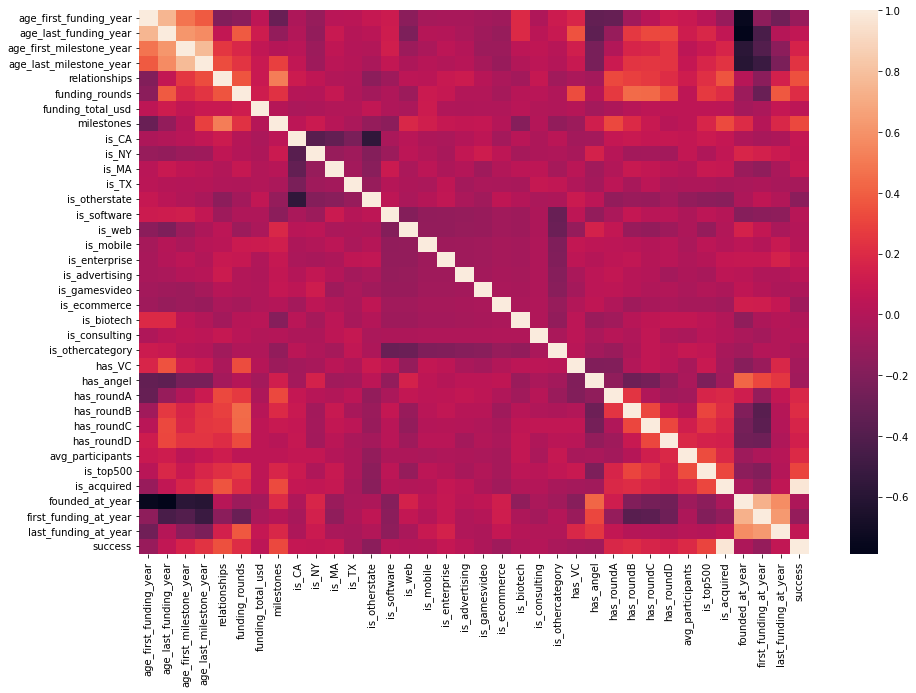

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, ax = ax)
plt.savefig('../Plots/Crr_matrix_heatmap.png')
plt.show()

In [13]:
df.to_csv('startup_data_clean2.csv', header=True, index=False)

Data is imbalanced, I will need to work on that.

Data exploration is further explored with Tableau.